# 1.3.3 예제 : 인구에 따른 살인 비율의 위치 추정

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2010년 미국 각 주별로 인구 10만명당 살인 비율**

In [6]:
state= pd.read_csv('./data/state.csv')

In [7]:
state.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
# 인구의 평균 구하기
state['Population'].mean()

6162876.3

**절사평균 : 크기 순으로 정렬한 후 양 끝에서 일정 개수의 값들을 삭제한 뒤 남은 값들을 가지고 구한 평균을 말한다.**

In [41]:
# trim = 0.1 인 절사평균을 구해보자. 
len(state['Population']) # state는 50개가 있고, 인구 데이터를 크기 순으로 정렬한 후 양쪽에서 0.1의 비율 즉 5개씩을 제외하고 남은 값들의 평균을 구해야한다.
sorted_pop = sorted(state['Population'].tolist())
trim_1_of_mean = np.mean(sorted_pop[5:-5])
print(trim_1_of_mean)

4783697.125


In [45]:
from scipy import stats
stats.trim_mean(state['Population'],0.1)

4783697.125

**가중평균 : 주마다 인구수(Population)이 다르기 때문에 미국 전체의 MurderRate를 구할때 단순히 더한값을 50(주의 개수)로 나누는것이 아니라, 인구수에 가중치를 주어야한다.**

In [46]:
# Murder.Rate의 정의는 Murder.Rate = (실제 살인사건 발생률 / 주의 인구수)*10만 미국 전체의 인구 10만명당 살인 사건을 구하기 위해서는
# 각 주의 범죄율에 각 주의 인구수를 곱하고 전체 미국의 인구수를 나누어준 값을 더해야한다.
state['Population_Rate'] = state['Population']/state['Population'].sum()

In [50]:
sum(state['Murder.Rate']*state['Population_Rate'])

4.445833981123394

# 1.4.3 예제 : 주별 인구의 변이 추정

**표준편차, 사분위 범위(IQR), 중위 절대편차(MAD) 구하기**

In [57]:
state['Population'].std() # 표준편차
IQR=state['Population'].quantile(0.75)-state['Population'].quantile(0.25)
print(IQR)

4847308.0


In [88]:
# 중위 절대 편차(MAD)
pop_med = state['Population'].median() # 인구의 중간값
abs_pop_minus_med = abs(state['Population']-4436369.5) # 인구데이터에서 중간값을 뺀 값들의 절대값
abs_pop_minus_med.median() # 이 값은 c=1이라는 파라미터를 설정해주어야만한다. 

2596702.0

In [111]:
import statsmodels.robust
statsmodels.robust.scale.mad(state['Population'],c=0.6744897501960817) # default c값은 c=0.6744897501960817 이다. 

3849876.1459979336

In [117]:
statsmodels.robust.scale.mad(state['Population'],c=1)

2596702.0

In [ ]:
# c=1 이라는 파라미터의 의미는? 가우시안 분포를 따를 때 c=0.6745라는 디폴트 값을 넣어서 계산하도록 한다. 

**로버스트의 사전적 의미는 '건장한' 이지만 통계학에서는 다른 이상치나, 에러값이 있어도 영향을 크게 받지 않는 통계량을 의미한다.**

In [120]:
zeroto18 = np.arange(0,20,2)
print(zeroto18) 
data = np.append(zeroto18,100) # 100이라는 특이값을 추가 해주기
statsmodels.robust.scale.mad(zeroto18)
statsmodels.robust.scale.mad(data)

[ 0  2  4  6  8 10 12 14 16 18]


8.895613311033612

In [122]:
zeroto18.std()

5.744562646538029

In [123]:
data.std()

26.727891149307982

# 1.5.1 백분위수와 상자그림

In [126]:
state['Murder.Rate'].quantile([0.05,0.10,0.5,0.75,0.9])

0.05    1.60
0.10    1.89
0.50    4.00
0.75    5.55
0.90    6.01
Name: Murder.Rate, dtype: float64

Text(0.5, 0, 'Population (millions)')

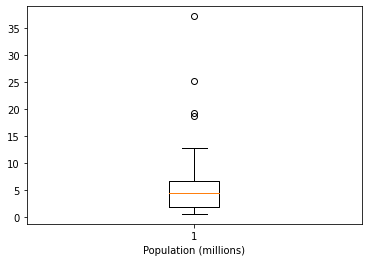

In [133]:
# 상자그림 
plt.boxplot(state['Population']/1_000_000)
plt.xlabel('Population (millions)')